#### Importing the Dependencies

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#### Data Collection and Analysis

In [7]:
# loading the data in pandas dataframe
diabetes_data = pd.read_csv('./diabetes_data.csv')

In [8]:
# displaying first 5 rows of dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# displaying last 5 rows of dataset
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
# printing the shape of dataset
print(f"shape of diabetes data: {diabetes_data.shape}")

shape of diabetes data: (768, 9)


In [11]:
# getting more info about dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# checking for missing values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
diabetes_data["Outcome"].value_counts()

# 0 - Diabetic

# 1 - Non Diabetic

0    500
1    268
Name: Outcome, dtype: int64

#### Splitting data into Features and Target

In [14]:
# Outcome column is the target and rest are Features
X = diabetes_data.drop(columns='Outcome', axis=1)
Y = diabetes_data["Outcome"]

In [15]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### Data Visualization

<AxesSubplot: xlabel='Glucose', ylabel='count'>

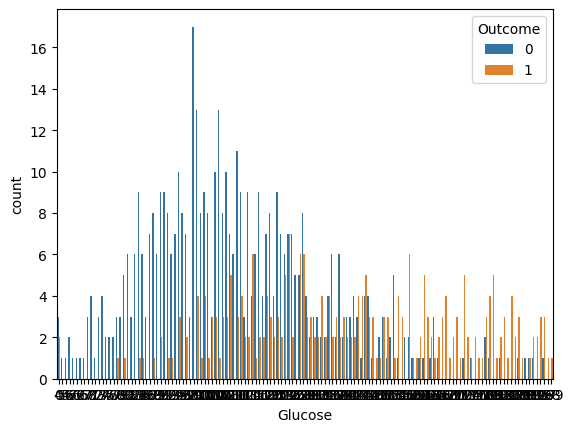

In [17]:
sns.countplot(x='Glucose', hue="Outcome", data=diabetes_data)

#### Data Standardization

In [18]:
scalar = StandardScaler()

In [19]:
# fitting the Features data into scalar for standardization/normalization
scalar.fit(X)

StandardScaler()

In [20]:
# getting the transformed data
standardized_data = scalar.transform(X)

In [21]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
X = standardized_data
Y = diabetes_data["Outcome"]

#### Splitting data into Train and Test data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


#### Model Training

In [25]:
clf = svm.SVC(kernel='linear')

In [26]:
# fit the training data in the svm model
clf.fit(X_train, Y_train)

SVC(kernel='linear')

#### Checking the Accuracy Score

In [27]:
# checking accuracy on train data
y_train_cap = clf.predict(X_train)
acc_train = accuracy_score(y_train_cap, Y_train)

In [28]:
print(acc_train)

0.7866449511400652


In [54]:
# checking accuracy on test data
y_test_cap = clf.predict(X_test)
acc_test = accuracy_score(y_test_cap, Y_test)

In [56]:
print(acc_test)

0.7727272727272727


#### Building a Predictive System

In [94]:
input_data = (0,1,38,2,0,2.3,0.1,19)
arr = np.asarray(input_data)
arr_reshape = arr.reshape(1, -1)
prediction = clf.predict(arr_reshape)
print(prediction)
if prediction[0] == 0:
    print("No diabetes")
else:
    print("You have diabetes")

[0]
No diabetes


#### Saving the trained model

In [32]:
import pickle

In [33]:
filename = 'trained_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [34]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [38]:
input_data = (5,109,75,26,0,36,0.546,60)
arr = np.asarray(input_data)
arr_reshape = arr.reshape(1, -1)
prediction = loaded_model.predict(arr_reshape)

if prediction[0] == 0:
    print("No diabetes")
else:
    print("You have diabetes")

You have diabetes
